### Load required packages

In [1]:
import sklearn
import pandas as pd
import pybgt
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from IPython.display import display, HTML

### Load data

In [2]:
sales = pd.read_csv("home_data.csv")
display(sales.head(5))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Split data into train and test

In [3]:
train_data, test_data = train_test_split(sales, test_size=0.2, random_state = 42)
print sales.shape
print train_data.shape
print test_data.shape

(21613, 21)
(17290, 21)
(4323, 21)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

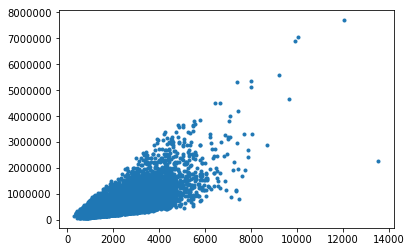

In [5]:
plt.plot(sales['sqft_living'],sales['price'], '.')

## Build regression model

In [6]:
lm = linear_model.LinearRegression()

Sklearn is weird and doesn't like pandas. This requires we reshape pandas columns into arrays for feeding it into 

In [7]:
X = train_data['sqft_living'].values.reshape(len(train_data.index),1)
y = train_data['price'].values
print X.shape, y.shape

(17290L, 1L) (17290L,)


In [8]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Test model outputs

In [9]:
test_x = test_data['sqft_living'].values.reshape(len(test_data.id),1)
test_y = test_data['price'].values.reshape(len(test_data.id),1)

In [10]:
y_pred = lm.predict(test_x)

In [11]:
# The coefficients
print 'Coefficients: %s' % lm.coef_
print 'Intercept: %s' % lm.intercept_
# The mean squared error
print("Root Mean Squared Error: %.2f"
      % sqrt(mean_squared_error(test_y, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))

Coefficients: [ 279.55477851]
Intercept: -41999.1845423
Root Mean Squared Error: 276559.18
Variance score: 0.49


In [12]:
print 'Mean test price is: %s' % test_y.mean()

Mean test price is: 549367.445061


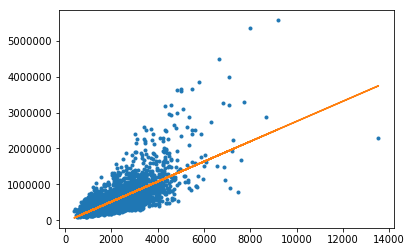

In [13]:
plt.plot(test_x, test_y, '.',
        test_x, y_pred, '-')
plt.xticks()
plt.yticks()
plt.show()

## Build a model with more features

In [14]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [15]:
X_my = train_data[my_features]
y = train_data['price']
print X_my.shape, y.shape

(17290, 6) (17290L,)


In [16]:
lm2 = linear_model.LinearRegression()

In [17]:
lm2.fit(X_my,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Test featured model outputs

In [18]:
test_x_my = test_data[my_features]
test_y = test_data['price']
print test_x_my.shape, test_y.shape

(4323, 6) (4323L,)


In [19]:
y_pred_my = lm2.predict(test_x_my)
print y_pred_my.shape

(4323L,)


In [20]:
# The coefficients
coeffs = pd.DataFrame({'feats': my_features, 'coeffs': lm2.coef_})
display(coeffs)
print 'Intercept: %s' % lm2.intercept_
# The mean squared error
print("Root Mean Squared Error: %.2f"
      % sqrt(mean_squared_error(test_y, y_pred_my)))
print 'Mean Absolute Error: %.2f' % mean_absolute_error(test_y, y_pred_my)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred_my))

,coeffs,feats
0,-56672.392426,bedrooms
1,16547.642239,bathrooms
2,313.063049,sqft_living
3,-0.320232,sqft_lot
4,-5766.620717,floors
5,581.860332,zipcode


Intercept: -57009888.5396
Root Mean Squared Error: 270717.19
Mean Absolute Error: 172878.76
Variance score: 0.52


# Programming Assignment

### Question 1
Determine the top zipcode by mean price of lot

In [21]:
mean_zips =sales.groupby(['zipcode'], sort = True)['price'].agg({'Mean_Price':'mean'})
display(mean_zips.sort_values('Mean_Price',ascending = False).head())

C:\Users\mmavricek.BGT\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Mean_Price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012582e+05


Top price for zipcode 98039 is $2.16M

### Question 2: Percentage of houses with sqft between 2k and 4k

In [22]:
sales_filt = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]

In [23]:
print sales_filt.shape[0]
print sales.shape[0]

9118
21613


In [24]:
perc_filt = float(sales_filt.shape[0]) / sales.shape[0]
print 'Percent of houses between 2,000 sqft and 4,000 sqft of living space is: {:.2%}'.format(perc_filt)

Percent of houses between 2,000 sqft and 4,000 sqft of living space is: 42.19%


### Question 3: Add more features and improve model

In [25]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [26]:
# create an X with more features
X_adv = train_data[advanced_features]
y = train_data['price']
print X_adv.shape, y.shape

(17290, 18) (17290L,)


In [27]:
# Train a linear regression model with 18 features
lm_adv = linear_model.LinearRegression()
lm_adv.fit(X_adv,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Create test sets for the more advanced model
test_x_adv = test_data[advanced_features]
test_y = test_data['price']
print test_x_my.shape, test_y.shape

(4323, 6) (4323L,)


In [29]:
# Test prediction of the advanced model
y_pred_adv = lm_adv.predict(test_x_adv)

In [30]:
# The coefficients
coeffs = pd.DataFrame({'feats': advanced_features, 'coeffs': lm_adv.coef_})
display(coeffs)
print 'Intercept: %s' % lm_adv.intercept_
# The mean squared error
print("Root Mean Squared Error: %.2f"
      % sqrt(mean_squared_error(test_y, y_pred_adv)))
print 'Mean Absolute Error: %.2f' % mean_absolute_error(test_y, y_pred_adv)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred_my))

,coeffs,feats
0,-34335.418949,bedrooms
1,44564.535806,bathrooms
2,109.015816,sqft_living
3,0.088847,sqft_lot
4,7003.124620,floors
5,-552.253009,zipcode
6,24526.710451,condition
7,94567.890640,grade
8,562413.070607,waterfront
9,53641.106700,view


Intercept: 6643871.38619
Root Mean Squared Error: 212539.52
Mean Absolute Error: 127493.34
Variance score: 0.52


In [31]:
rmse_my = sqrt(mean_squared_error(test_y, y_pred_my))
rmse_adv = sqrt(mean_squared_error(test_y, y_pred_adv))
print '6 feature model RMSE: %s' % rmse_my
print '18 feature model RMSE: %s' % rmse_adv

# Print the difference between the root mean squared error of the smaller and advanced feature models
rmse_diff = sqrt(mean_squared_error(test_y, y_pred_my)) - sqrt(mean_squared_error(test_y, y_pred_adv))
print 'RMSE Error difference between model with 6 and 18 features is: %s' % rmse_diff

6 feature model RMSE: 270717.188999
18 feature model RMSE: 212539.516734
RMSE Error difference between model with 6 and 18 features is: 58177.672265


## Attempt regressions using logistic regressions and newton solver

In [32]:
#nm_adv = linear_model.LogisticRegression(solver='newton-cg', max_iter = )
#nm_my = linear_model.LogisticRegression(solver='newton-cg', max_iter = 10, tol = 0.01, verbose=1)
#nm_adv.fit(X_adv, y)
#nm_my.fit(X_my, y)